Available columns in the dataset:
['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']


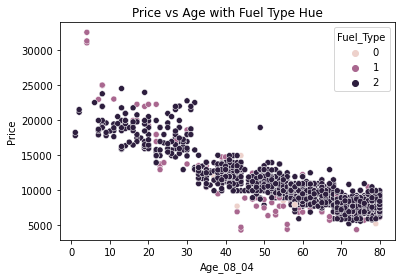

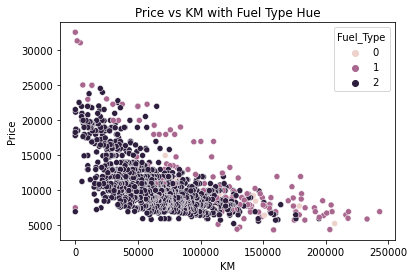

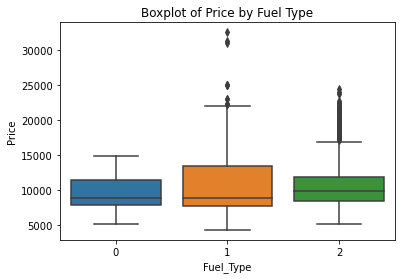

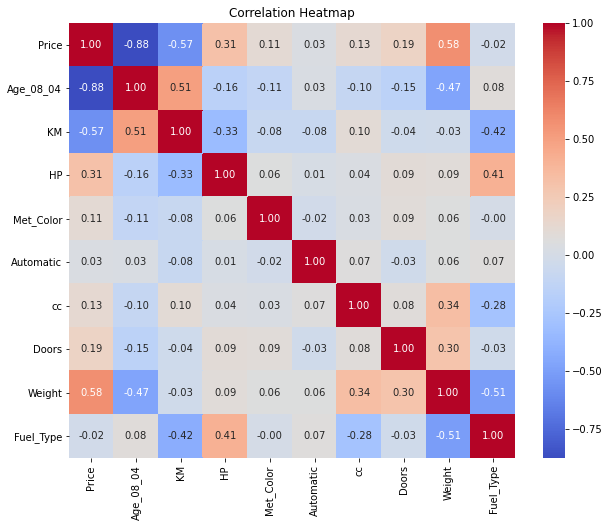

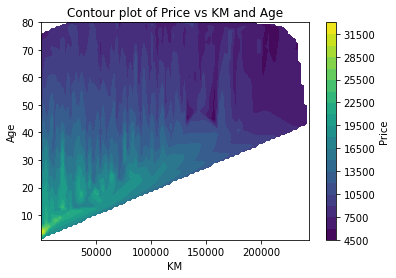

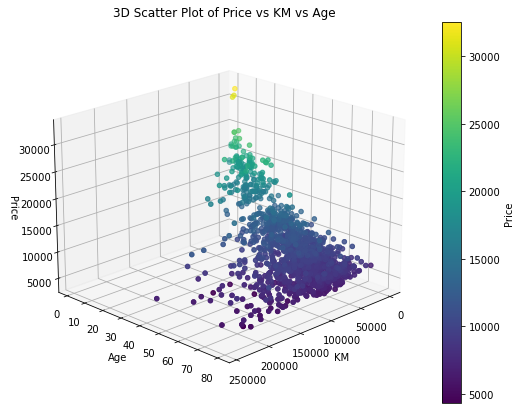

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from scipy.interpolate import griddata


df = pd.read_csv('ToyotaCorolla.csv')
print("Available columns in the dataset:")
print(df.columns.tolist())


df = df[['Price', 'Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight', 'Fuel_Type']]


# Encode categorical data
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

# ===============================
# 1. Scatter Plot (Price vs Age & KM)
# ===============================
sns.scatterplot(data=df, x='Age_08_04', y='Price', hue='Fuel_Type')
plt.title('Price vs Age with Fuel Type Hue')
plt.show()

sns.scatterplot(data=df, x='KM', y='Price', hue='Fuel_Type')
plt.title('Price vs KM with Fuel Type Hue')
plt.show()

# ===============================
# 2. Box Plot (Categorical Distribution)
# ===============================
sns.boxplot(data=df, x='Fuel_Type', y='Price')
plt.title('Boxplot of Price by Fuel Type')
plt.show()

# ===============================
# 3. Heatmap (Correlation Matrix)
# ===============================
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# ===============================
# 4. Contour Plot (Price as function of KM and Age)
# ===============================
x = df['KM']
y = df['Age_08_04']
z = df['Price']

# Grid definition
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='linear')

plt.contourf(xi, yi, zi, levels=20, cmap='viridis')
plt.xlabel('KM')
plt.ylabel('Age')
plt.title('Contour plot of Price vs KM and Age')
plt.colorbar(label='Price')
plt.show()

# ===============================
# 5. 3D Surface Plot
# ===============================
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df_no_nan['KM']
y = df_no_nan['Age_08_04']
z = df_no_nan['Price']

ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points by Price
ax.set_xlabel('KM')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Price vs KM vs Age')
ax.view_init(elev=20, azim=45) # Adjust view angle for better perspective
plt.colorbar(ax.scatter(x, y, z, c=z, cmap='viridis'), label='Price') # Add a colorbar
plt.show()
